**Prepare**

In [24]:
import pandas as pd
import gdown
# File ID from the Google Drive link
file_id = '1UbX5XusoQ-4ZBNdPV7hTFuckgRi0tmX3'

download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'downloaded_file.csv'
gdown.download(download_url, output_file, quiet=False)

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1UbX5XusoQ-4ZBNdPV7hTFuckgRi0tmX3
To: /content/downloaded_file.csv
100%|██████████| 623k/623k [00:00<00:00, 85.3MB/s]


**Process**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [3]:
data.describe()

,average_price,houses_sold,no_of_crimes
count,1.354900e+04,13455.000000,7439.000000
mean,2.635197e+05,3893.994129,2158.352063
std,1.876175e+05,12114.402476,902.087742
min,4.072200e+04,2.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000
50%,2.229190e+05,371.000000,2132.000000
75%,3.368430e+05,3146.000000,2582.000000
max,1.463378e+06,132163.000000,7461.000000


In [4]:
data.isnull().sum()

,0
date,0
area,0
average_price,0
code,0
houses_sold,94
no_of_crimes,6110


In [8]:
data[data.duplicated()]

,date,area,average_price,code,houses_sold,no_of_crimes


In [9]:
data.nunique()

,0
date,301
area,45
average_price,13343
code,45
houses_sold,3946
no_of_crimes,2669


In [10]:
data.count()

,0
date,13549
area,13549
average_price,13549
code,13549
houses_sold,13455
no_of_crimes,7439


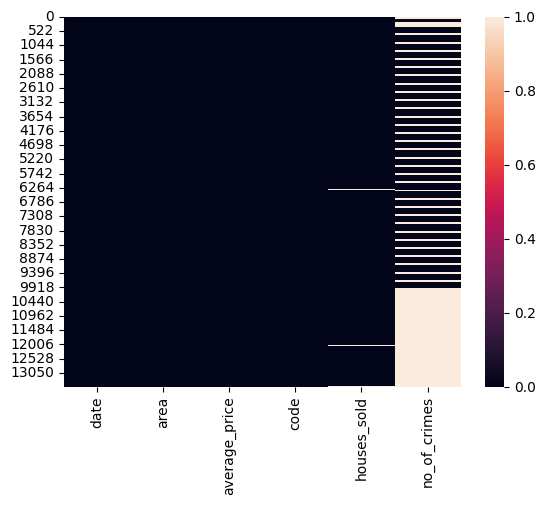

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull())
plt.show()

In [25]:
data['date'] = pd.to_datetime(data['date'])
data.head(5)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [14]:
data.dtypes

,0
date,datetime64[ns]
area,object
average_price,int64
code,object
houses_sold,float64
no_of_crimes,float64


In [26]:
data['Year'] = data.date.dt.year

In [18]:
data.columns.values

array(['date', 'area', 'average_price', 'code', 'houses_sold',
       'no_of_crimes', 'Year'], dtype=object)

In [27]:
data.insert(1, 'month', data.date.dt.month)
data.head(2)

,date,month,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995


In [29]:
data.drop(columns=['Year', 'month'], axis=1, inplace=True)

In [30]:
data.columns.values

array(['date', 'area', 'average_price', 'code', 'houses_sold',
       'no_of_crimes'], dtype=object)

In [31]:
data.columns.values

array(['date', 'area', 'average_price', 'code', 'houses_sold',
       'no_of_crimes'], dtype=object)

In [32]:
data[data.no_of_crimes == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [33]:
len(data[data.no_of_crimes == 0])

104

In [35]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [46]:

data[data.area == 'england'].groupby(data.date.dt.year).average_price.agg(['min', 'max'])


,min,max
date,,
1995,52788,53901
1996,52333,55755
1997,55789,61564
1998,61659,65743
1999,65522,75071
2000,75219,84191
2001,84245,95992
2002,96215,119982
2003,121610,138985


In [47]:
data.head(5)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


In [49]:
data.groupby('area').no_of_crimes.agg(['min', 'max']).sort_values(ascending=False, by='max')

,min,max
area,,
westminster,3504.0,7461.0
lambeth,2381.0,4701.0
camden,2079.0,4558.0
southwark,2267.0,3821.0
newham,2130.0,3668.0
hackney,1870.0,3466.0
ealing,1871.0,3401.0
islington,1871.0,3384.0
tower hamlets,1646.0,3316.0


from matplotlib import pyplot as plt
_df_0['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

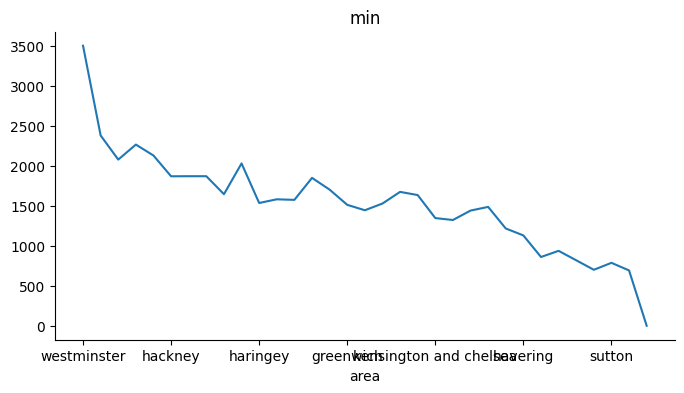

In [51]:
from matplotlib import pyplot as plt
_df_3['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

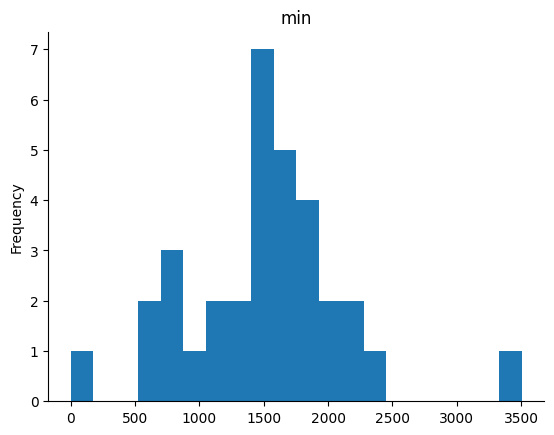

In [50]:
from matplotlib import pyplot as plt
_df_0['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [52]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [61]:
data[data.average_price < 100000].area.value_counts()

,count
area,
north east,112
north west,111
yorks and the humber,110
east midlands,96
west midlands,94
england,87
barking and dagenham,85
south west,78
east of england,76


In [64]:

for col in data.columns:
    print("the mode of the col", col)
    print(data[col].mode()[0])
    print("&" * 30)


the mode of the col date
1996-02-01 00:00:00
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the mode of the col area
enfield
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the mode of the col average_price
71070
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the mode of the col code
E09000010
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the mode of the col houses_sold
233.0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the mode of the col no_of_crimes
0.0
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
the mode of the col year
1996
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&


In [65]:
import pandas as pd
for col in data.columns:
  for i in range(len(data)):
     if pd.isna(data[col][i]):
        data[col][i] = data[col].mode()[0]


In [66]:
data.isnull().sum()

,0
date,0
area,0
average_price,0
code,0
houses_sold,0
no_of_crimes,0
year,0


In [67]:
print('Export the data in excell')
data.to_excel('data_house.xlsx')

Export the data in excell


**Dashboad**

In [68]:
#@title Tableau Dashboard
from IPython.display import HTML

HTML("""
<div class='tableauPlaceholder' id='viz1752416215143' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;House_prise&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='House_prise&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ho&#47;House_prise&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1752416215143');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='827px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>     </script>""")